#Exploratory Data Analysis

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

#1.Importing Libraries

In [1]:
#Importing pandas library

import pandas as pd

#imporing numpy library

import numpy as np

#importing matplotlib

import matplotlib

from matplotlib import pyplot

import matplotlib.pyplot as plt

#import scipy
import scipy.integrate as integrate

import scipy

from scipy import stats

#importing seaborn
import seaborn as  sns

#importing maths
from math import sqrt

print('Libraries imported')

Libraries imported


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#2.Reading The data

In [2]:
#Reading the data
Auto_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')#Reading the dataset using the pandas function
Auto_df.head()#Displaying the first five rows of the dataset


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
print(Auto_df.shape)#shows the number of rows and columns of the dataset

(16085, 13)


In [4]:
#Previewing  the bottom of the dataset
Auto_df.tail()#Displaying the last five rows

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [5]:
#Reading the variable data
Var = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
Var

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [6]:
# Checking whether each column has an appropriate datatype

Auto_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [7]:
#Changing the date column to datetime

Auto_df['date'] = pd.to_datetime(Auto_df['date'])


In [8]:
Auto_df['Postal code'].astype(int)

0        75001
1        75001
2        75001
3        75001
4        75001
         ...  
16080    95880
16081    95880
16082    95880
16083    95880
16084    95880
Name: Postal code, Length: 16085, dtype: int64

In [9]:
#
Auto_df.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2018-06-12 00:00:00,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-06-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000


In [10]:
# Getting info about the dataset
Auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [11]:
# Changing all the columns to lowercase
Auto_df.columns = Auto_df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Auto_df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

#4.External Data Source Validation

The data source was got from Moringa School LMS which I believe was originally obtained from this link below:https://opendata.paris.fr/explore/?refine.theme=Equipements,+Services,+Social&disjunctive.theme&disjunctive.publisher&disjunctive.keyword&disjunctive.modified&disjunctive.features&sort=modified&refine.modified=2017&refine.modified=2019
The page a reliable site with very accurate information making our data valid

##a) Validation

#5.Tidying the dataset

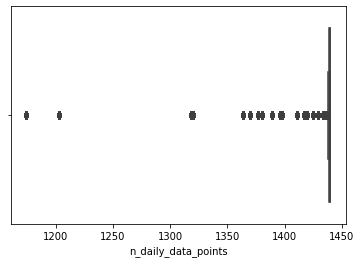

In [12]:
#Checking for outliers

sns.boxplot(x=Auto_df['n_daily_data_points'])

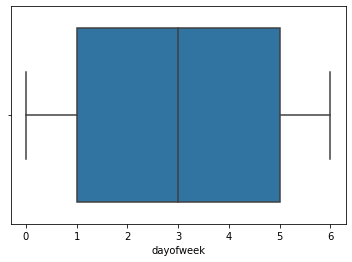

In [13]:
#Checking for outliers in the dayofWeek column

sns.boxplot(x=Auto_df['dayofweek'])

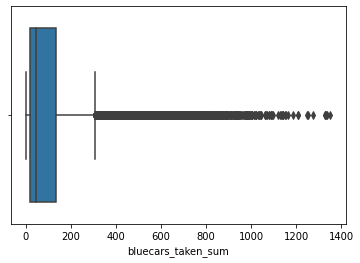

In [14]:
#Checking for outliers in the BlueCars_taken_sum

sns.boxplot(x=Auto_df['bluecars_taken_sum'])

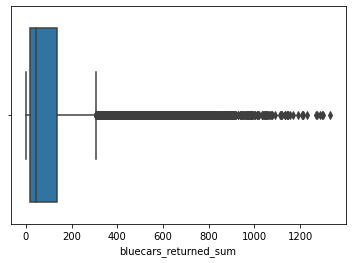

In [15]:
#Checking for outliers in the BlueCars_returned_sum

sns.boxplot(x=Auto_df['bluecars_returned_sum'])

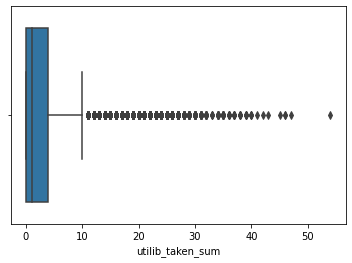

In [16]:
#Checking for outliers in the Utilib_taken_sum

sns.boxplot(x=Auto_df['utilib_taken_sum'])

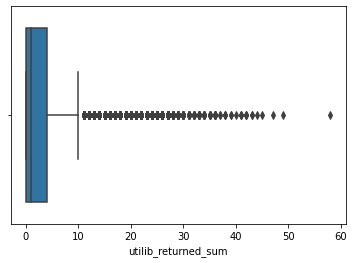

In [17]:
#Checking for outliers in the Utilib_returned_sum

sns.boxplot(x=Auto_df['utilib_returned_sum'])

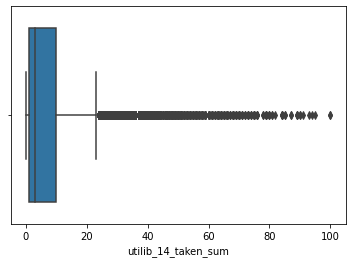

In [18]:
#Checking for outliers in the Utilib_14_taken_sum

sns.boxplot(x=Auto_df['utilib_14_taken_sum'])

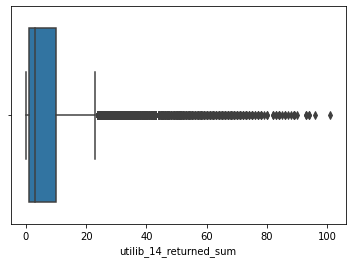

In [19]:
#Checking for outliers in the Utilib_14_returned_sum column

sns.boxplot(x=Auto_df['utilib_14_returned_sum'])

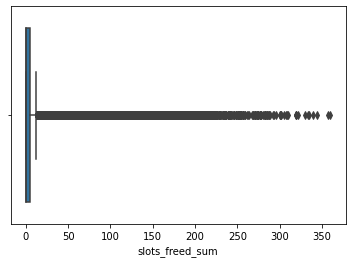

In [20]:
#Checking for outliers in the Slots_freed_sum 

sns.boxplot(x=Auto_df['slots_freed_sum'])

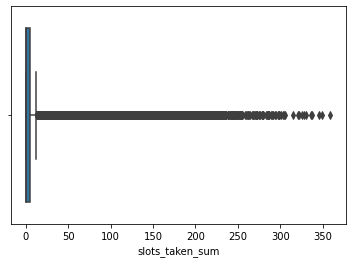

In [21]:
# Checking for outliers in the Slots_taken_sum

sns.boxplot(x=Auto_df['slots_taken_sum'])

In [22]:
#Checking for duplicates
Auto_df.duplicated().any()

False

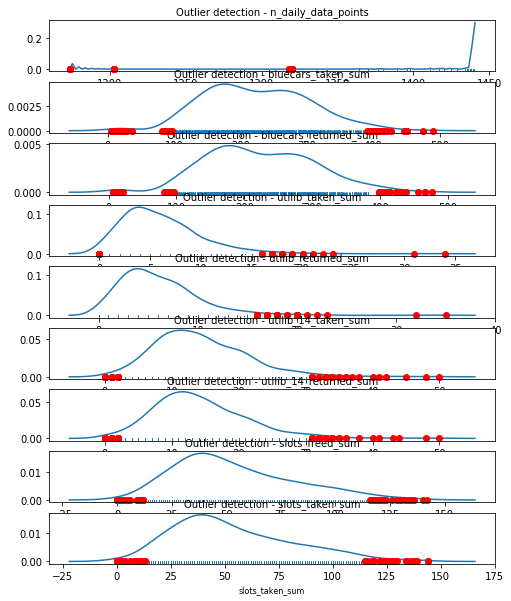

In [23]:
#Removing outliers
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['n_daily_data_points','bluecars_taken_sum','bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum','slots_freed_sum', 'slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
    x = Auto_df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [24]:
#Checking for anomalies
data = Auto_df['n_daily_data_points']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,':n_daily_data_points')

data = Auto_df['bluecars_taken_sum']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,':bluecars_taken_sum')

data = Auto_df['bluecars_returned_sum']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,':bluecars_returned_sum')

data = Auto_df['utilib_taken_sum']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,':Utilib_taken_sum')

data = Auto_df['utilib_returned_sum']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,':Utilib_returned_sum')

data=Auto_df['utilib_14_taken_sum']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,'Utilib_14_taken_sum')

data=Auto_df['utilib_14_returned_sum']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,':Utilib_14_returned_sum')

data = Auto_df['slots_taken_sum']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,':Slots_taken_sum')

data =Auto_df['slots_freed_sum']
Q1 = np.quantile(data,0.25)
Q3 = np.quantile(data,0.75)
IQR = Q3 - Q1
print(IQR,':Slots_freed_sum')


1.0 :n_daily_data_points
115.0 :bluecars_taken_sum
115.0 :bluecars_returned_sum
4.0 :Utilib_taken_sum
4.0 :Utilib_returned_sum
9.0 Utilib_14_taken_sum
9.0 :Utilib_14_returned_sum
5.0 :Slots_taken_sum
5.0 :Slots_freed_sum


#Univariate Analysis

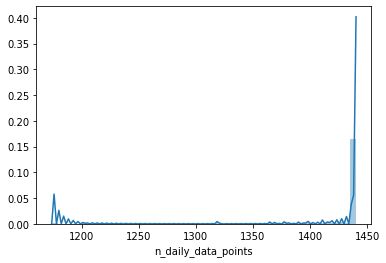

In [25]:
#Displaying a histogram on daily_data_points columns

sns.distplot(Auto_df.n_daily_data_points.dropna());

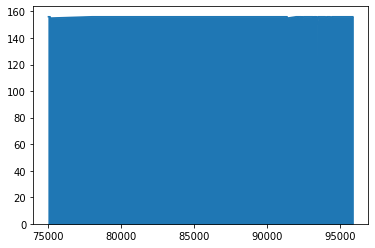

In [26]:
#Displaying area chart for postal code

Auto_df['postal_code'].value_counts().sort_index().plot.area()



Text(0.5, 1.0, 'postal_code')

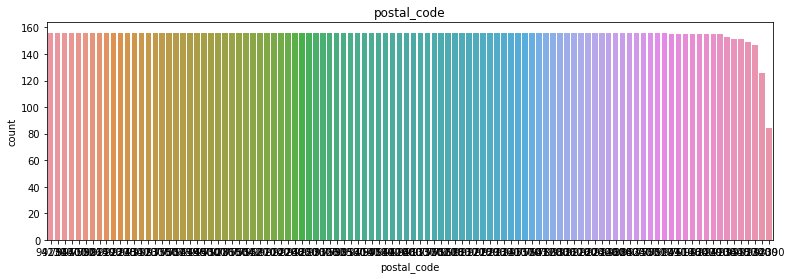

In [27]:
plt.figure(figsize = (13,4))

sns.countplot(Auto_df['postal_code'].dropna(), order = Auto_df['postal_code'].value_counts(). index)
plt.title('postal_code')

Text(0.5, 1.0, 'Type of day')

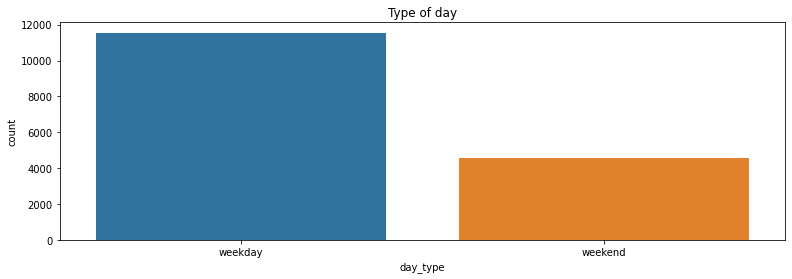

In [28]:
plt.figure(figsize = (13,4))
sns.countplot(Auto_df['day_type'].dropna(), order = Auto_df['day_type'].value_counts().index)
plt.title('Type of day')

Text(0.5, 1.0, 'Days of the week')

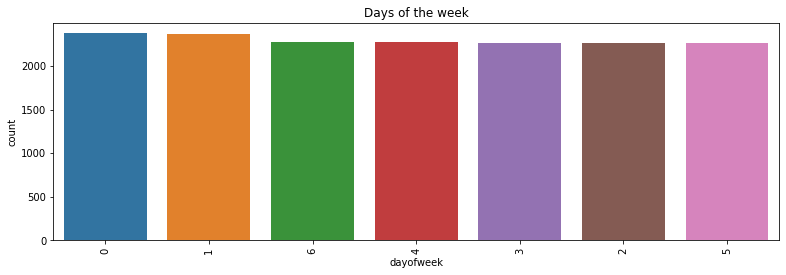

In [29]:
#Displaying a histogram on dayOfWeek column

plt.figure(figsize = (13,4))

sns.countplot(Auto_df['dayofweek'].dropna(), order = Auto_df['dayofweek'].value_counts(). index);
plt.xticks(rotation = 90);
plt.title('Days of the week')

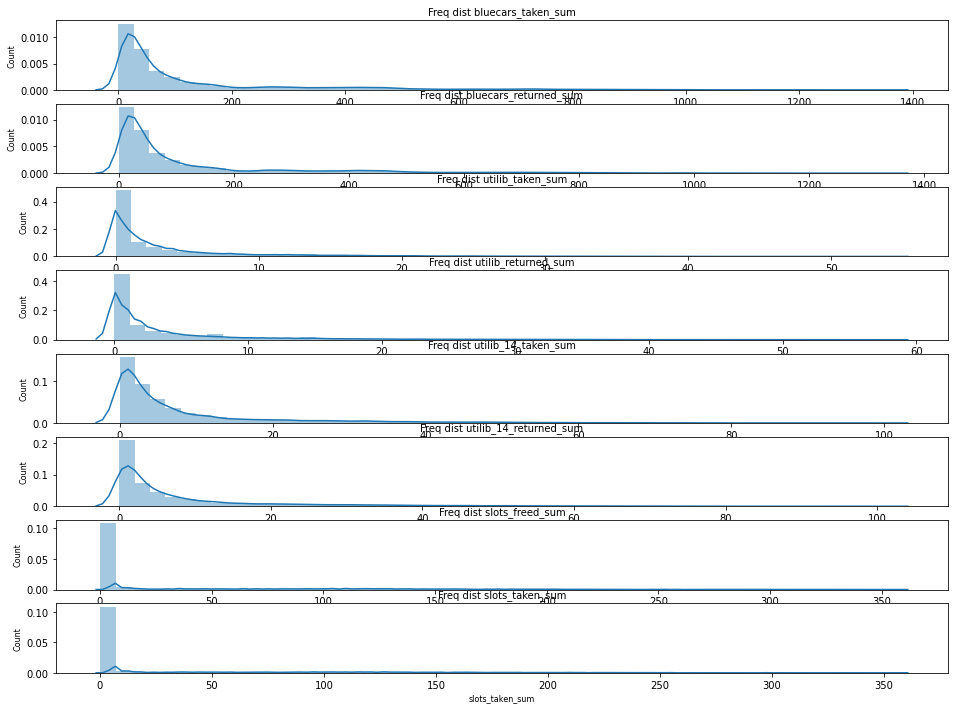

In [30]:
#Exploratory Analysis

#Displaying household size, age and year variables
col_names = ['bluecars_taken_sum','bluecars_returned_sum',
             'utilib_taken_sum','utilib_returned_sum',
             'utilib_14_taken_sum','utilib_14_returned_sum',
             'slots_freed_sum','slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(Auto_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

The variables above are all right-skewed meaning positive skewness

#Multivariate Analysis

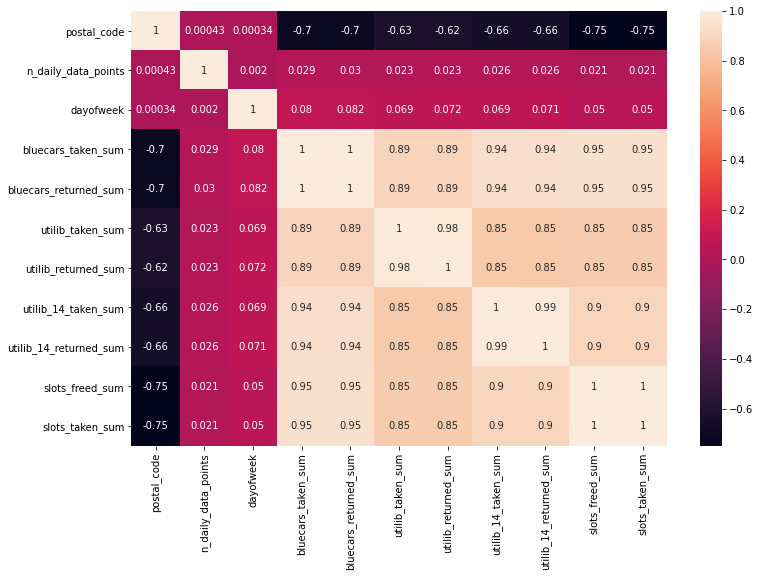

In [31]:
#Showign the correlations of different variables to each other

plt.figure(figsize=(12, 8))

auto_corr = Auto_df.corr()
sns.heatmap(auto_corr, 
            xticklabels = auto_corr.columns.values,
            yticklabels = auto_corr.columns.values,
            annot = True);

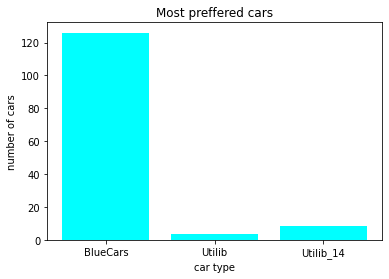

In [32]:
#Which car is more prefered car taken()

#fig, ax = plt.subplots()
#ax.set_color_cycle(['red', 'black', 'yellow']) 

all_cars= [Auto_df.bluecars_taken_sum.mean(),
           Auto_df.utilib_taken_sum.mean(),
           Auto_df.utilib_14_taken_sum.mean()]

titles = ['BlueCars', 'Utilib', 'Utilib_14']

#Creating a bar grapph

plt.bar(titles, all_cars, color = 'cyan')
plt.xlabel('car type')
plt.ylabel('number of cars')
plt.title('Most preffered cars')
plt.show()

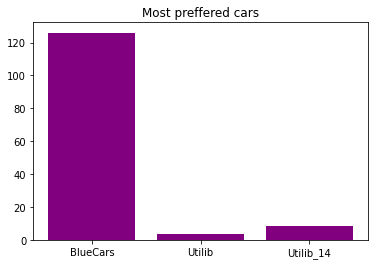

In [33]:
#Which number of cars were mostly returned to the station

all_cars= [Auto_df.bluecars_returned_sum.mean(),
           Auto_df.utilib_returned_sum.mean(),
           Auto_df.utilib_14_returned_sum.mean()]

titles = ['BlueCars', 'Utilib', 'Utilib_14']

#Creating a bar grapph

plt.bar(titles, all_cars, color = 'purple')
plt.title('Most preffered cars')
plt.show()

125.92695057506994


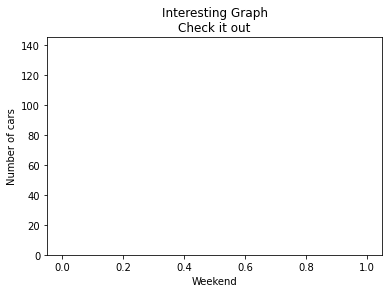

In [34]:
#THe taken cars both weekends and weekdays

weekday= Auto_df.day_type == 'weekday'

weekend = Auto_df.day_type == 'weekend'

Bluecars=Auto_df.bluecars_taken_sum.mean()
print(Bluecars)
Utilib=Auto_df.utilib_taken_sum.mean()
Utilib_14=Auto_df.utilib_14_taken_sum.mean()

plt.stackplot(weekday,Bluecars,Utilib,Utilib_14, colors=['red','orange','yellow'])

plt.xlabel('Weekend')
plt.ylabel('Number of cars')
plt.title('Interesting Graph\nCheck it out')
plt.show()

#plt.bar(weekend,all_cars, label="Cars taken on weekends", color='g')
#plt.legend()
#plt.xlabel('Type of day')
#plt.ylabel('Number of cars')

#plt.title('Epic Graph\nAnother Line! Whoa')

#plt.show()

In [35]:
#Calculating the number of blue cars returned to each postal code
Auto_group=Auto_df.groupby(pd.Grouper(('postal_code')))
df2=Auto_group['bluecars_taken_sum'].mean().sort_values(ascending=False)
df2

postal_code
75015    896.955128
75016    790.301282
75017    734.493590
75013    541.596154
75019    525.467949
            ...    
93150      5.258278
94100      4.832258
93370      3.744966
93390      3.630952
93440      3.443709
Name: bluecars_taken_sum, Length: 104, dtype: float64

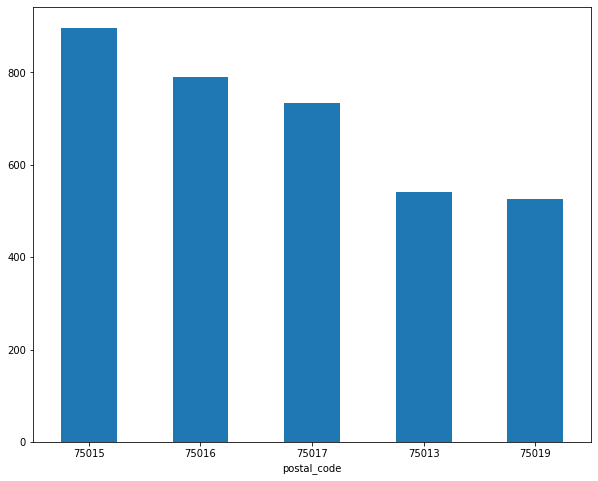

In [36]:
prev_5 = df2.head()

prev_5.plot.bar(figsize=(10,8), y='postal_code' ,rot=0)



In [37]:
#Calculating the number of blue cars returned to each postal code
Auto_group=Auto_df.groupby(pd.Grouper(('postal_code')))
df2=Auto_group['bluecars_returned_sum'].mean().sort_values(ascending=False)
df2

postal_code
75015    897.070513
75016    789.884615
75017    734.237179
75013    541.339744
75019    525.788462
            ...    
93150      5.225166
94100      4.812903
93370      3.731544
93390      3.595238
93440      3.483444
Name: bluecars_returned_sum, Length: 104, dtype: float64

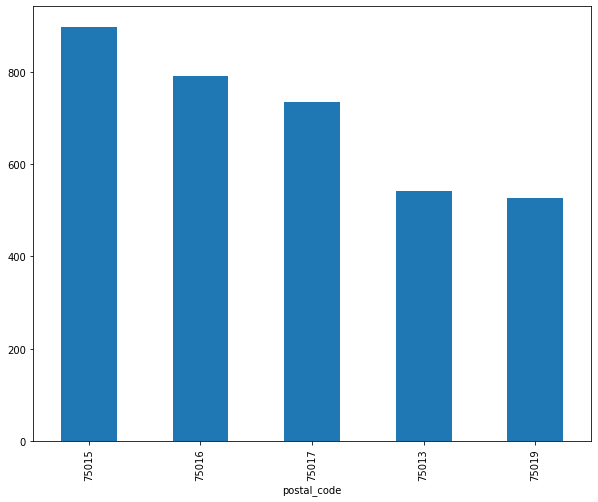

In [38]:
prev_5 = df2.head()

prev_5.plot.bar(figsize=(10,8), y='postal_code', )

# Hypothesis Testing

##First Hypothesis
Null Hypothesis: The number of blue cars is the same in different regions; 75015 and 75017 during the weekday : p = 92723

Alternative hypothesis: The number of blue cars is different in different regions; 75015 and 75017 during the weekday: p =! 92723



In [39]:
#Loading data with the weekday observation under the daytype variable
y = Auto_df[Auto_df['day_type']=='weekday']
y

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,95880,2018-06-13,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0,2,3,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,3,5,2,2,0,0


In [40]:
ty = y[y['postal_code'] ==75015 & 75017]
ty

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
1248,75009,2018-01-01,1440,0,weekday,336,336,7,8,21,20,72,70
1249,75009,2018-01-02,1438,1,weekday,266,258,4,5,12,12,44,45
1250,75009,2018-01-03,1439,2,weekday,324,309,8,6,15,16,58,54
1251,75009,2018-01-04,1320,3,weekday,335,335,8,11,15,13,54,59
1252,75009,2018-01-05,1440,4,weekday,378,360,9,7,25,26,77,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,75009,2018-06-13,1440,2,weekday,326,325,12,12,29,29,87,90
1398,75009,2018-06-14,1439,3,weekday,332,325,20,20,19,17,72,66
1399,75009,2018-06-15,1440,4,weekday,321,328,6,5,12,13,63,68
1402,75009,2018-06-18,1440,0,weekday,304,274,10,9,19,17,59,54


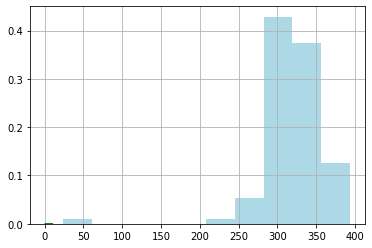

In [42]:
#Checking the normality of the data in the variable bluecars
bluecars = ty['bluecars_taken_sum'].sort_values(ascending = True)
bluecars_mean, bluecars_std = bluecars.mean(), bluecars.std()

# Plot histogram (normalized) - LIGHT-BLUE
bluecars.hist(color='lightblue', weights = np.zeros_like(bluecars) + 1.0 / bluecars.count())
plt.title = 'Normality of the distribution'


# Plot line graph - RED
#bluecars.value_counts(sort=False, normalize=True).plot.line(color='red')

# Normal distribution for random points between 1 to 10 with mean, std.
random_data = np.arange(1, 10, 0.001)
pyplot.plot(random_data, stats.norm.pdf(random_data, bluecars_mean, bluecars_std), color='green')

314    6
319    5
345    4
284    4
327    3
      ..
328    1
326    1
325    1
378    1
259    1
Name: bluecars_taken_sum, Length: 72, dtype: int64


Text(0, 0.5, 'Frequency')

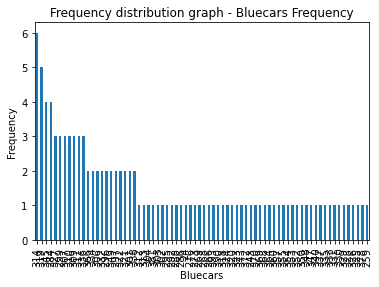

In [43]:

bluecars_freq = bluecars.value_counts(sort=True)
print(bluecars_freq)
plt=bluecars_freq.plot.bar()
plt.set_title("Frequency distribution graph - Bluecars Frequency")
plt.set_xlabel("Bluecars")
plt.set_ylabel("Frequency")

In [45]:
y.dtypes

postal_code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayofweek                          int64
day_type                          object
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object

In [46]:
C_post = y.groupby('postal_code')['postal_code'].count()
C_post.head(20)

postal_code
75001    112
75002    112
75003    112
75004    112
75005    112
75006    112
75007    112
75008    112
75009    112
75010    112
75011    112
75012    112
75013    112
75014    112
75015    112
75016    112
75017    112
75018    112
75019    112
75020    112
Name: postal_code, dtype: int64

In [47]:
#Obtaining the means of blue cars in the postal code region of 75015 and 75017 during the weekday
mean_post=y.groupby('postal_code')['bluecars_taken_sum'].mean().sort_values(ascending=False)
mean_post


postal_code
75015    827.883929
75016    752.580357
75017    696.571429
75013    496.053571
75019    463.964286
            ...    
93150      4.373832
94100      3.522523
93390      3.118644
93370      3.019048
93440      2.981481
Name: bluecars_taken_sum, Length: 104, dtype: float64

In [48]:
#Standard deviation of the blue cars in the postal code region of 75015 and 75017 during the weekday
dev_post=y.groupby('postal_code')['bluecars_taken_sum'].std().sort_values(ascending=False)
dev_post

postal_code
75015    125.243816
75016    105.516545
75017     84.898744
75019     68.064216
75013     66.929012
            ...    
93150      2.527298
93370      2.170523
93440      2.109088
94100      2.101285
93390      1.992094
Name: bluecars_taken_sum, Length: 104, dtype: float64

In [49]:
#Obtaining the sum of blue cars in the postal code region of 75015 and 75017 during the weekday
mean_post=y.groupby('postal_code')['bluecars_taken_sum'].sum().sort_values(ascending=False)
mean_post

postal_code
75015    92723
75016    84289
75017    78016
75013    55558
75019    51964
         ...  
93150      468
94100      391
93440      322
93370      317
93390      184
Name: bluecars_taken_sum, Length: 104, dtype: int64

In [50]:
#Variables during the weekday period
# post_code = 75015, 75017
# mean      = 823.5, 685.81
#sample size =112
#sample standard deviation=85.827
x_bar = 696.571429
pmean = 827.883929
n=112
s=84.898744

t =sqrt(n)
print(t)
SE= (85.827/t)
print(SE)
z_scores = (x_bar - pmean)/SE
print(z_scores ,"The z statistic")

p_values = scipy.stats.norm.sf(abs(z_scores))*2
print(p_values)

#Test significance
alpha= 0.05
if (p_values< alpha):
    print("indicates strong evidence against the null hypothesis, so you reject the null hypothesis")
else:
	print("indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis")

#Test for sensitivity

alpha=0.01
if (p_values<alpha):
  print('Reject the null hypothesis, accept the alternative')
else:
  print('fail to reject the null hypothesis')







10.583005244258363
8.109889206240736
-16.19165153316178 The z statistic
5.775732323394884e-59
indicates strong evidence against the null hypothesis, so you reject the null hypothesis
Reject the null hypothesis, accept the alternative


## Second Hypothesis
Null hypothesis: The number of blue cars in postal code 75015 is less than or equal to postal code 75017; population </= 685.

Alternative hypothesis: The number of blue cars in postal code 75015 is greater than postal code 75017; population > 685

In [51]:
t =sqrt(n)
print(t)
SE= (85.827/t)
print(SE)
z_scores = (685 - 823)/SE
print(z_scores ,"The z statistic")

p_values = scipy.stats.norm.sf(abs(z_scores))
print(p_values)

#Test significance
alpha= 0.25
if (p_values< alpha):
    print("indicates strong evidence against the null hypothesis, so you reject the null hypothesis")
else:
	print("indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis")
 
# Test for Sensitivity 

alpha = 0.005
if (p_values< alpha):
  print('Reject the null hypothesis, accept the alternative')
else:
  print('Fail to reject the null hypothesis')

10.583005244258363
8.109889206240736
-17.01626205864884 The z statistic
3.110898321934569e-65
indicates strong evidence against the null hypothesis, so you reject the null hypothesis
Reject the null hypothesis, accept the alternative


## Third Hypothesis

Null hypothesis:The number of blue cars is the same in different between regions with the postal codes 75015 and 75017 during the weekends; population = 

Alternative hypothesis: The number of blue cars is different in different regions of postal codes 75015 and 75017 during weekends;
population =!

In [52]:
#Loading data with the weekday observation under the daytype variable
a= Auto_df[Auto_df['day_type']=='weekend']
a


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,2018-01-07,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,2018-01-13,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,2018-01-14,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,2018-01-20,1439,5,weekend,217,217,2,2,25,25,41,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,95880,2018-06-03,1440,6,weekend,36,33,1,1,2,2,0,0
16074,95880,2018-06-09,1440,5,weekend,15,15,0,0,1,2,0,0
16075,95880,2018-06-10,1440,6,weekend,34,32,0,0,1,0,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0,2,1,0,0


In [53]:
a.dtypes

postal_code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayofweek                          int64
day_type                          object
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object

In [54]:
C_post = a.groupby('postal_code')['postal_code'].count()
C_post.head(20)

postal_code
75001    44
75002    44
75003    44
75004    44
75005    44
75006    44
75007    44
75008    44
75009    44
75010    44
75011    44
75012    44
75013    44
75014    44
75015    44
75016    44
75017    44
75018    44
75019    44
75020    44
Name: postal_code, dtype: int64

In [55]:
#Obtaining the means of blue cars in the postal code region of 75015 and 75017 during the weekend
mean_post=a.groupby('postal_code')['bluecars_returned_sum'].mean().sort_values(ascending=False)
mean_post

postal_code
75015    1084.250000
75016     889.977273
75017     857.500000
75019     683.386364
75013     657.477273
            ...     
93150       6.795455
93370       5.363636
92360       5.047619
93390       5.040000
93440       4.813953
Name: bluecars_returned_sum, Length: 104, dtype: float64

In [56]:
#Standard deviation of the blue cars in the postal code region of 75015 and 75017 during the weekend
dev_post=a.groupby('postal_code')['bluecars_returned_sum'].std().sort_values(ascending=False)
dev_post

postal_code
75015    199.177743
75016    169.056408
75017    156.137462
75013    115.090963
75019    114.977291
            ...    
93370      3.524604
92360      3.075889
93390      2.893671
93440      2.620940
94100      2.576935
Name: bluecars_returned_sum, Length: 104, dtype: float64

In [57]:
#Standard deviation of the blue cars in the postal code region of 75015 and 75017 during the weekend
sum_post=a.groupby('postal_code')['bluecars_returned_sum'].sum().sort_values(ascending=False)
sum_post

postal_code
75015    47707
75016    39159
75017    37730
75019    30069
75013    28929
         ...  
93150      299
93370      236
92360      212
93440      207
93390      126
Name: bluecars_returned_sum, Length: 104, dtype: int64

In [58]:
#For this hypothesis we will use z statistic since the sample values are more than 20

pmean=1084.250000
smean=857.500000
dev= 156
n=44

SE=(156.137462)/sqrt(n)
print(SE)

z_score = (smean - pmean)/SE
print(z_score, 'the z statistic')

p_values = scipy.stats.norm.sf(abs(z_scores))*2
print(p_values, 'the p_value of the test statistic')

#Test significance
alpha= 0.05
if (p_values< alpha):
    print("indicates strong evidence against the null hypothesis, so you reject the null hypothesis")
else:
	print("indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis")
 
#Testing sensitivity

alpha= 0.01
if (p_values <alpha):
  print('reject the null hypothesis and accept the alternative')
else:
  print('fail to reject the null hypothesis')


23.538608053289735
-9.633109973480765 the z statistic
6.221796643869138e-65 the p_value of the test statistic
indicates strong evidence against the null hypothesis, so you reject the null hypothesis
reject the null hypothesis and accept the alternative


## Fourth Hypothesis

Null Hypothesis: The number of blue cars in postal code 75015 region is less than or equal to the region post code of 75017 on weekends

Alternative Hypothesis: The number of blues cars in postal code 75015 region is more than the region postal code of 75017 on weekends

In [61]:
#For this hypothesis we will use z statistic since the sample values are more than 20

pmean=1084.250000
smean=857.500000
dev= 156
n=44

SE=(156.137462)/sqrt(n)
print(SE)

z_score = (smean - pmean)/SE
print(z_score, 'the z statistic')

p_values = scipy.stats.norm.sf(abs(z_scores))
print(p_values, 'the p_value of the test statistic')

#Test significance
alpha= 0.25
if (p_values< alpha):
    print("indicates strong evidence against the null hypothesis, so you reject the null hypothesis")
else:
	print("indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis")
 
#Test for sensitivity
alpha = 0.005
if (p_values<alpha):
  print('reject the null hypothesis and accept the alternative')
else:
  print('fail to reject the null hypothesis')






28.506670003001897
-7.954278769709759 the z statistic
3.110898321934569e-65 the p_value of the test statistic
indicates strong evidence against the null hypothesis, so you reject the null hypothesis
reject the null hypothesis and accept the alternative
